In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy

sympy.init_printing()

### Variable Definitions

In [2]:
t, r, theta, phi, phi_tilde = sympy.symbols("t r theta phi \\tilde{\phi}")

In [3]:
dt, dr, dtheta, dphi, dphi_tilde = sympy.symbols(r"dt dr d\theta d\phi d\tilde{\phi}")

In [4]:
r_tilde, delta_r, delta_theta, W, xi = sympy.symbols("\\tilde{r} Delta_r Delta_theta W Xi")

In [5]:
tau, dtau = sympy.symbols("tau d\\tau")

In [6]:
a, r_tilde_plus = sympy.symbols("a \\tilde{r}_+")

### Metric

In [7]:
metric_orig = -delta_r / W * (dt - a * sympy.sin(theta) ** 2 * dphi / xi) ** 2
metric_orig += delta_theta * sympy.sin(theta) ** 2 / W * (a * dt - (r_tilde ** 2 + a ** 2) * dphi / xi) ** 2
metric_orig

#### Just Wick Rotation

In [8]:
dt_val = sympy.I * dtau

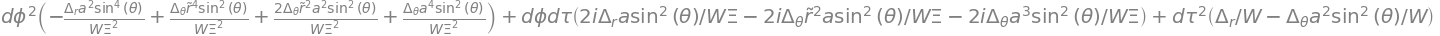

In [9]:
euclidean_metric = metric_orig.subs({dt: dt_val}).expand().collect([dtau ** 2, dtau * dphi, dphi ** 2])
euclidean_metric

In [10]:
metric_list_matrix = [[0 for i in range(2)] for i in range(2)]
metric_list_matrix[0][0] = euclidean_metric.coeff(dtau ** 2)
metric_list_matrix[0][1] = euclidean_metric.coeff(dtau * dphi) / 2
metric_list_matrix[1][0] = metric_list_matrix[0][1]
metric_list_matrix[1][1] = euclidean_metric.coeff(dphi ** 2)

In [11]:
g_mat = sympy.Matrix(metric_list_matrix)
g_mat.simplify()
g_mat

⎡                          2    2                                       ⎛     
⎢             Δᵣ - Δₜₕₑₜₐ⋅a ⋅sin (θ)                                ⅈ⋅a⋅⎝Δᵣ - 
⎢             ──────────────────────                                ──────────
⎢                       W                                                     
⎢                                                                             
⎢    ⎛                     2           2⎞    2     ⎛      2    2              
⎢ⅈ⋅a⋅⎝Δᵣ - Δₜₕₑₜₐ⋅\tilde{r}  - Δₜₕₑₜₐ⋅a ⎠⋅sin (θ)  ⎝- Δᵣ⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅\
⎢────────────────────────────────────────────────  ───────────────────────────
⎢                      W⋅Ξ                                                    
⎣                                                                             

                2           2⎞    2                    ⎤
Δₜₕₑₜₐ⋅\tilde{r}  - Δₜₕₑₜₐ⋅a ⎠⋅sin (θ)                 ⎥
──────────────────────────────────────                 ⎥
            W⋅Ξ                       

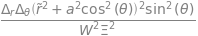

In [12]:
g_mat.det().simplify()

In [13]:
g_00 = delta_r - delta_theta * a ** 2 * sympy.sin(theta) ** 2
g_00

In [14]:
g_11 = (r_tilde ** 2 + a ** 2) ** 2 * delta_theta - delta_r * a ** 2 * sympy.sin(theta) ** 2
g_11

In [15]:
(g_11 * sympy.sin(theta) ** 2 / (W * xi ** 2) - g_mat[1, 1]).simplify()

In [16]:
delta_r_val = (r_tilde ** 2 - r_tilde_plus ** 2) ** 2 + (r_tilde_plus ** 2 + 1) ** 2 * ((r_tilde_plus - r_tilde) ** 2)
delta_r_val

In [17]:
xi_val = 1 - a ** 2
a_val = r_tilde_plus ** 2
delta_theta_val = 1 - a ** 2 * sympy.cos(theta) ** 2

##### $g_{00}$

In [18]:
g_00_simp = g_00.subs({delta_r: delta_r_val, xi: xi_val, delta_theta: delta_theta_val}).subs({a: a_val})
g_00_simp = g_00_simp.expand().collect([r_tilde, r_tilde ** 2, r_tilde ** 3, r_tilde ** 4])
g_00_simp

In [19]:
A_coeff_00 = g_00_simp.coeff(r_tilde).simplify()
A_coeff_00.factor()

In [20]:
B_coeff_00 = g_00_simp.coeff(r_tilde ** 2).simplify().factor()
B_coeff_00

In [21]:
C_coeff_00 = g_00_simp.coeff(r_tilde ** 4).simplify().factor()
C_coeff_00

In [22]:
D_coeff_00 = g_00_simp - A_coeff_00 * r_tilde - B_coeff_00 * r_tilde ** 2 - C_coeff_00 * r_tilde ** 4
D_coeff_00.factor()

##### $g_{11}$

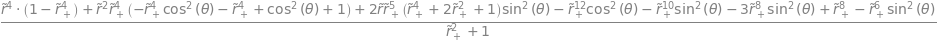

In [23]:
g_11_simp = g_11.subs({delta_r: delta_r_val, delta_theta: delta_theta_val}).subs({a: a_val})
g_11_simp /= (r_tilde_plus ** 2 + 1)
g_11_simp = g_11_simp.expand().collect([r_tilde, r_tilde ** 2, r_tilde ** 3, r_tilde ** 4])
g_11_simp.simplify()

In [24]:
A_coeff_11 = g_11_simp.coeff(r_tilde).simplify()
A_coeff_11.factor()

In [25]:
B_coeff_11 = g_11_simp.coeff(r_tilde ** 2).simplify().factor()
B_coeff_11

In [26]:
C_coeff_11 = g_11_simp.coeff(r_tilde ** 4).simplify().factor()
C_coeff_11

In [27]:
D_coeff_11 = g_11_simp - A_coeff_11 * r_tilde - B_coeff_11 * r_tilde ** 2 - C_coeff_11 * r_tilde ** 4
D_coeff_11.simplify().factor()

This is the same as:

In [28]:
D_coeff_11_new = -r_tilde_plus ** 6 * (r_tilde_plus ** 4 * sympy.cos(theta) ** 2 - r_tilde_plus ** 2 * sympy.cos(2 * theta) + sympy.sin(theta) ** 2)
D_coeff_11_new

In [29]:
(D_coeff_11 - D_coeff_11_new).simplify()

In [30]:
sigma_quartic = C_coeff_11 * r_tilde ** 4 + B_coeff_11 * r_tilde ** 2 + A_coeff_11 * r_tilde + D_coeff_11_new
sigma_quartic

In [31]:
sol = sympy.solve(sigma_quartic, r_tilde)

In [32]:
roots = {}

r_tilde_plus_vals = range(1, 21)
theta_val = 0

for r_tilde_plus_val in r_tilde_plus_vals:
    root_vals = []
    for i in range(4):
        root = sol[i].subs({r_tilde_plus: r_tilde_plus_val, theta: theta_val}).evalf()
        root_vals.append(root)
    roots[r_tilde_plus_val] = root_vals

In [33]:
roots

{1: [nan, nan, nan, nan], 2: [-1.61558713397062e-27 - 4.0⋅ⅈ, 1.61558713381465e
-27 + 4.0⋅ⅈ, -1.61558713381465e-27 - 4.0⋅ⅈ, 1.61558713397062e-27 + 4.0⋅ⅈ], 3: 
[-2.87215490483075e-27 - 9.0⋅ⅈ, 2.87215490456528e-27 + 9.0⋅ⅈ, -2.8721549045652
8e-27 - 9.0⋅ⅈ, 2.87215490483075e-27 + 9.0⋅ⅈ], 4: [-6.46234853588248e-27 - 16.0
⋅ⅈ, 6.46234853525858e-27 + 16.0⋅ⅈ, -6.46234853525858e-27 - 16.0⋅ⅈ, 6.462348535
88248e-27 + 16.0⋅ⅈ], 5: [-8.27180612604307e-27 - 25.0⋅ⅈ, 8.27180612501748e-27 
+ 25.0⋅ⅈ, -8.27180612501748e-27 - 25.0⋅ⅈ, 8.27180612604307e-27 + 25.0⋅ⅈ], 6: [
-1.1488619619323e-26 - 36.0⋅ⅈ, 1.14886196182611e-26 + 36.0⋅ⅈ, -1.1488619618261
1e-26 - 36.0⋅ⅈ, 1.1488619619323e-26 + 36.0⋅ⅈ], 7: [-1.68812369919037e-26 - 49.
0⋅ⅈ, 1.68812369898525e-26 + 49.0⋅ⅈ, -1.68812369898525e-26 - 49.0⋅ⅈ, 1.68812369
919037e-26 + 49.0⋅ⅈ], 8: [-2.58493941435299e-26 - 64.0⋅ⅈ, 2.58493941410343e-26
 + 64.0⋅ⅈ, -2.58493941410343e-26 - 64.0⋅ⅈ, 2.58493941435299e-26 + 64.0⋅ⅈ], 9: 
[-2.04242126566901e-26 - 81.0⋅ⅈ, 2.04242126545705e-2

In [34]:
root_imag_part = [r[1].coeff(sympy.I) for r in roots.values()]
root_imag_part

In [35]:
root_real_part = [r[1] - sympy.I * r[1].coeff(sympy.I) for r in roots.values()]
root_real_part

[nan, 1.61558713381465e-27, 2.87215490456528e-27, 6.46234853525858e-27, 8.2718
0612501748e-27, 1.14886196182611e-26, 1.68812369898525e-26, 2.58493941410343e-
26, 2.04242126545705e-26, 3.30872245000699e-26, 5.46896272737377e-26, 4.595447
84730445e-26, 7.83129573973677e-26, 6.75249479594101e-26, 5.88217324452178e-26
, 1.03397576564137e-25, 9.15909328728528e-26, 8.16968506182821e-26, 1.46646978
394548e-25, 1.3234889800028e-25]

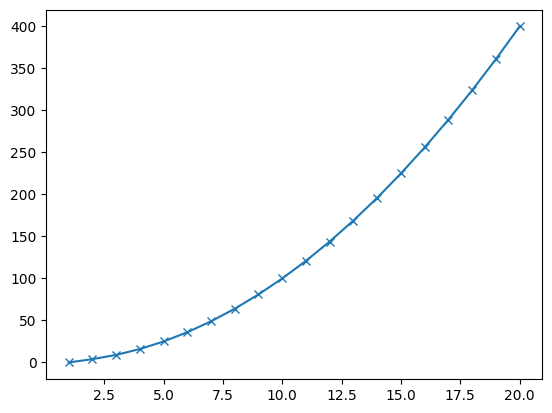

In [36]:
plt.plot(r_tilde_plus_vals, root_imag_part, 'x-');

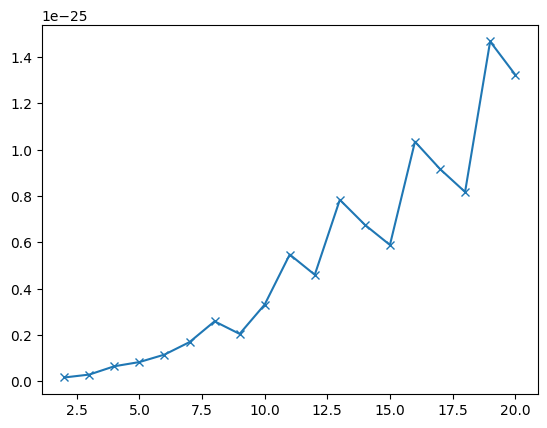

In [37]:
plt.plot(r_tilde_plus_vals, root_real_part, 'x-');

#### Wick Rotation + Omega Shift

In [38]:
omega = sympy.symbols("Omega")
dphi_val = dphi_tilde + omega * dt_val
dphi_val

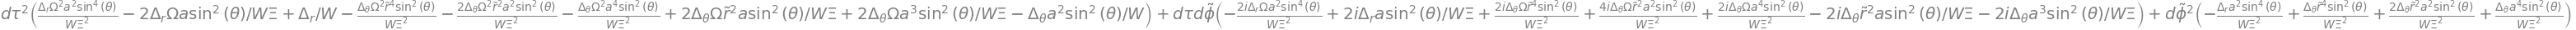

In [39]:
euclidean_metric_2 = euclidean_metric.subs({dphi: dphi_val}).expand().collect([dtau ** 2, dtau * dphi_tilde, dphi_tilde ** 2])
euclidean_metric_2

In [40]:
metric_list_matrix = [[0 for i in range(2)] for i in range(2)]
metric_list_matrix[0][0] = euclidean_metric_2.coeff(dtau ** 2)
metric_list_matrix[0][1] = euclidean_metric_2.coeff(dtau * dphi_tilde) / 2
metric_list_matrix[1][0] = metric_list_matrix[0][1]
metric_list_matrix[1][1] = euclidean_metric_2.coeff(dphi_tilde ** 2)

In [41]:
g_mat_2 = sympy.Matrix(metric_list_matrix)
g_mat_2.simplify()
g_mat_2

⎡ 2 ⎛    2    2                      4                     2  2           4⎞  
⎢Ω ⋅⎝Δᵣ⋅a ⋅sin (θ) - Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  - Δₜₕₑₜₐ⋅a ⎠⋅s
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                     ⎛  ⎛      2    2                      4                 
⎢                   ⅈ⋅⎝Ω⋅⎝- Δᵣ⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅\tilde{r}  + 2⋅Δₜₕₑₜₐ⋅\tild
⎢                   ──────────────────────────────────────────────────────────
⎢                                                                             
⎣                                                                             

  2              ⎛                      2           2⎞    2       2 ⎛         
in (θ) + 2⋅Ω⋅Ξ⋅a⋅⎝-Δᵣ + Δₜₕₑₜₐ⋅\tilde{r}  + Δₜₕₑₜₐ⋅

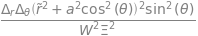

In [42]:
g_mat_2.det().simplify()

##### $g_{00}$

In [43]:
g_00 = delta_r * (xi - a * omega * sympy.sin(theta) ** 2) ** 2 - delta_theta * (a * xi - omega * (r_tilde ** 2 + a ** 2)) ** 2 * sympy.sin(theta) ** 2
g_00

In [44]:
(g_00 / (W * xi ** 2) - g_mat_2[0, 0]).expand().simplify()

In [45]:
g_00_simp = g_00.subs({delta_r: delta_r_val, xi: xi_val, delta_theta: delta_theta_val}).subs({a: a_val})
g_00_simp = g_00_simp.expand().collect([r_tilde, r_tilde ** 2, r_tilde ** 3, r_tilde ** 4])
g_00_simp

In [46]:
A_coeff_00 = g_00_simp.coeff(r_tilde).simplify()
A_coeff_00.factor()

In [47]:
B_coeff_00 = g_00_simp.coeff(r_tilde ** 2).simplify().factor()
B_coeff_00

In [48]:
C_coeff_00 = g_00_simp.coeff(r_tilde ** 4).simplify().factor()
C_coeff_00

In [49]:
D_coeff_00 = g_00_simp - A_coeff_00 * r_tilde - B_coeff_00 * r_tilde ** 2 - C_coeff_00 * r_tilde ** 4
D_coeff_00.simplify().factor()

##### $g_{11}$

This component remains unchanged.

#### Wick Rotation + Omega Shift + Non-rotating Frame

In [50]:
dphi_prime = sympy.symbols("d\phi'")
dphi_tilde_val = dphi_prime - a * dt_val
dphi_tilde_val

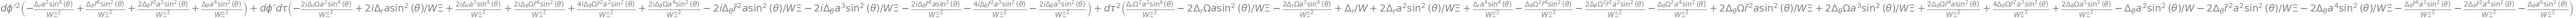

In [51]:
euclidean_metric_3 = euclidean_metric_2.subs({dphi_tilde: dphi_tilde_val}).expand().collect([dtau ** 2, dtau * dphi_prime, dphi_prime ** 2])
euclidean_metric_3

In [52]:
metric_list_matrix = [[0 for i in range(2)] for i in range(2)]
metric_list_matrix[0][0] = euclidean_metric_3.coeff(dtau ** 2)
metric_list_matrix[0][1] = euclidean_metric_3.coeff(dtau * dphi_prime) / 2
metric_list_matrix[1][0] = metric_list_matrix[0][1]
metric_list_matrix[1][1] = euclidean_metric_3.coeff(dphi_prime ** 2)

In [53]:
g_mat_3 = sympy.Matrix(metric_list_matrix)
g_mat_3.simplify()
g_mat_3

⎡ 2 ⎛             2    2   ⎞         ⎛                                 2      
⎢Ξ ⋅⎝Δᵣ - Δₜₕₑₜₐ⋅a ⋅sin (θ)⎠ + 2⋅Ξ⋅a⋅⎝-Δᵣ⋅Ω + Δᵣ⋅a + Δₜₕₑₜₐ⋅Ω⋅\tilde{r}  + Δₜₕ
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢       ⎛        2    2          3    2                        4              
⎢     ⅈ⋅⎝- Δᵣ⋅Ω⋅a ⋅sin (θ) + Δᵣ⋅a ⋅sin (θ) + Δₜₕₑₜₐ⋅Ω⋅\tilde{r}  + 2⋅Δₜₕₑₜₐ⋅Ω⋅
⎢     ────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎣                                                                             

       2                   2             3⎞    2              2 ⎛    2    2   
ₑₜₐ⋅Ω⋅a  - Δₜₕₑₜₐ⋅\tilde{r} ⋅a - Δₜₕₑₜₐ⋅a ⎠⋅sin (θ)

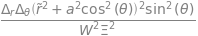

In [54]:
g_mat_3.det().simplify()

##### $g_{00}$

In [55]:
g_00 = delta_r * (xi + a * (a - omega) * sympy.sin(theta) ** 2) ** 2 - delta_theta * sympy.sin(theta) ** 2 * (a * xi + (a - omega) * (r_tilde ** 2 + a ** 2)) ** 2
g_00

In [56]:
(g_00 / (W * xi ** 2) - g_mat_3[0, 0]).expand().simplify()

In [57]:
g_00 = g_00.subs({omega: 1})
g_00

In [58]:
g_00_simp = g_00.subs({delta_r: delta_r_val, xi: xi_val, delta_theta: delta_theta_val}).subs({a: a_val})
g_00_simp = g_00_simp.expand().collect([r_tilde, r_tilde ** 2, r_tilde ** 3, r_tilde ** 4])
g_00_simp

In [59]:
A_coeff_00 = g_00_simp.coeff(r_tilde).simplify()
A_coeff_00

In [60]:
B_coeff_00 = g_00_simp.coeff(r_tilde ** 2).simplify().factor()
B_coeff_00

This is the same as:

In [61]:
B_coeff_00_2 = (r_tilde_plus - 1) ** 2 * (r_tilde_plus + 1) ** 2 * (r_tilde_plus ** 2 + 1) ** 2 * (r_tilde_plus ** 4 * sympy.cos(theta) ** 4 + 1)
B_coeff_00_2

In [62]:
(B_coeff_00 - B_coeff_00_2).simplify()

In [63]:
g_00_simp.coeff(r_tilde ** 3).simplify()

In [64]:
C_coeff_00 = g_00_simp.coeff(r_tilde ** 4).simplify().factor()
C_coeff_00

In [65]:
D_coeff_00 = g_00_simp - A_coeff_00 * r_tilde - B_coeff_00 * r_tilde ** 2 - C_coeff_00 * r_tilde ** 4
D_coeff_00.simplify()

This is the same as:

In [66]:
D_coeff_00_new = (r_tilde_plus - 1) ** 2 * (r_tilde_plus + 1) ** 2 * (r_tilde_plus ** 2 + 1) ** 2 * r_tilde_plus ** 2 * (r_tilde_plus ** 2 * sympy.cos(theta) ** 2 + (r_tilde_plus ** 2 * sympy.cos(theta) ** 2 + 1) ** 2)
D_coeff_00_new

In [67]:
(D_coeff_00 - D_coeff_00_new).simplify()

##### $g_{11}$

This component remains unchanged.